## Help International - Clustering Problem

**Problem Statement**

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

**Business Objectives**

Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

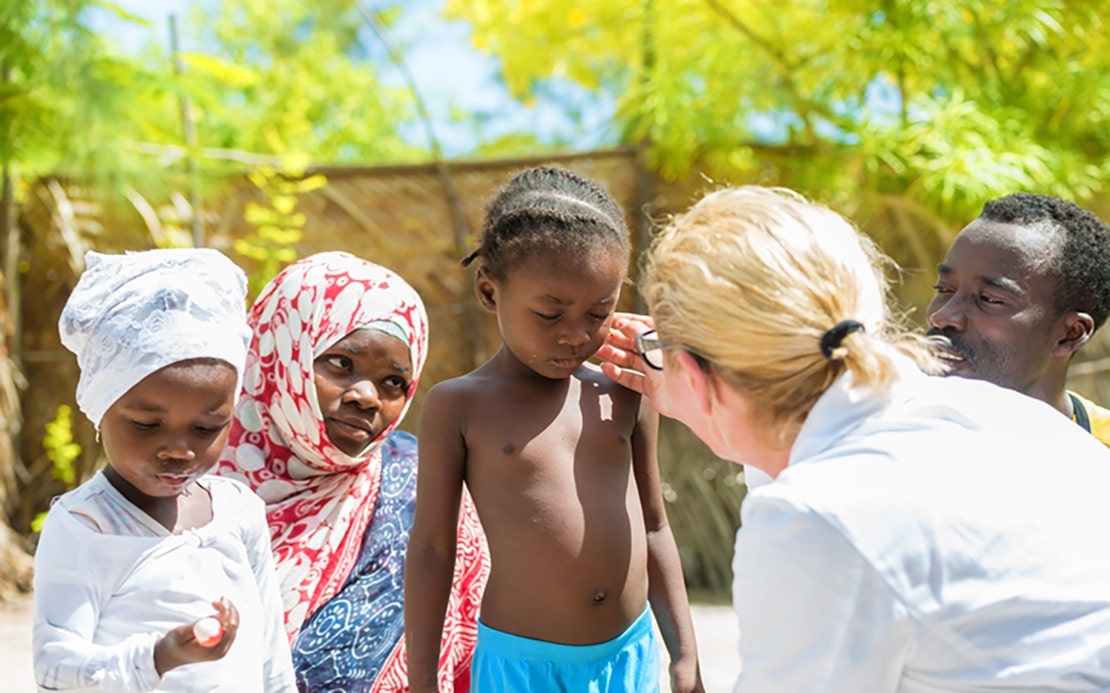

### Steps to follow

1. `Reading and understanding the Data`
2. `Data Cleaning`
3. `EDA & Visualisation`
4. `Data Preperation`

    - Scaling of Attributes
    - Principle Component Analyis
    - Hopkins Score
    
 
5. `Model Building - Clustering`
    - KMeans Clustering
    - Elbow Curve
    - Silhouette Analysis
    - Hierarchial Clustering
    
    
6. `Choosing the Best Model`
7. `Arriving Solution to the Task`

### Importing the core libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# lets choose ggplot as the default style for plotting
plt.style.use('ggplot')

## Data Dictionary - Column Discription

- `country`	Name of the country
- `child_mort`	Death of children under 5 years of age per 1000 live births
- `exports`	Exports of goods and services per capita. Given as %age of the GDP per capita
- `health`	Total health spending per capita. Given as %age of GDP per capita
- `imports`	Imports of goods and services per capita. Given as %age of the GDP per capita
- `Income`	Net income per person
- `Inflation`	The measurement of the annual growth rate of the Total GDP
- `life_expec`	The average number of years a new born child would live if the current mortality patterns are to remain the same
- `total_fer`	The number of children that would be born to each woman if the current age-fertility rates remain the same.
- `gdpp`	The GDP per capita. Calculated as the Total GDP divided by the total population.


## 1.Reading & Understanding the Data

In [3]:
# Reading the dataframe from the csv file
path_country = 'Country-data.csv'

country = pd.read_csv(path_country)
country.shape

(167, 10)

In [4]:
# Removing the duplicated records if any
country.drop_duplicates(inplace = True)

# printing the shape and the head of the data frame
print(country.shape)
country.head()

(167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# printing general information on the dataframe
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 14.4+ KB


In [6]:
# Lets look at the statistical summary of the dataframe
country.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.27,40.33,2.60,8.25,19.30,62.10,208.00
exports,167.0,41.11,27.41,0.11,23.80,35.00,51.35,200.00
health,167.0,6.82,2.75,1.81,4.92,6.32,8.60,17.90
imports,167.0,46.89,24.21,0.07,30.20,43.30,58.75,174.00
income,167.0,17144.69,19278.07,609.00,3355.00,9960.00,22800.00,125000.00
inflation,167.0,7.78,10.57,-4.21,1.81,5.39,10.75,104.00
life_expec,167.0,70.56,8.89,32.10,65.30,73.10,76.80,82.80
total_fer,167.0,2.95,1.51,1.15,1.80,2.41,3.88,7.49
gdpp,167.0,12964.16,18328.70,231.00,1330.00,4660.00,14050.00,105000.00


## 2.Data Cleaning

**Handling Missing Values**

In [7]:
# check for the miising/null values

country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**Inference :** 
    
- No Null values found in the dataframe

**Check for Duplication**

In [8]:
# Confirming the the country column does not contain any duplicated entries

country['country'].duplicated().sum()

0

**Verifying the Datatypes of each variables**

In [9]:
# Lets check for the datatype of the columns

country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

**Inference :**

- The datatypes of all the columns are ok, hence no conversions are required

**Data Cleaning is Done - Let go to data exploration and visualise the data to get some insights**

## 3.EDA & Data Visualisation

In [10]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**User Defined Function to highlight the Top5 correlations**

In [11]:
# user defined function to find and highlight the top five correlation in a dataframe
def corr_top5(df):
    
    corr = df.corr()
    corr = corr.unstack().reset_index()
    corr = corr.rename({0:'corr_value',
                        'level_0':'var_1',
                        'level_1':'var_2'}, axis = 1)

    corr = corr[~(corr['var_1'] == corr['var_2'])]
    corr['combined_var'] = corr.apply(lambda x : sorted([x.var_1, x.var_2]), axis = 1)
    corr = corr[~corr['combined_var'].duplicated(keep = 'first')]

    corr['abs_corr_value'] = corr['corr_value'].abs()
    corr['corr_dir'] = corr['corr_value'].apply(lambda x : 'Positive' if x > 0 else 'Negative' if x < 0 else 'No Correlation')
    corr.sort_values(by = 'abs_corr_value', ascending = False, inplace = True)
    corr.drop(['combined_var','corr_value'], axis = 1, inplace = True)
    corr = corr.head(5)
    ind = [1,2,3,4,5]
    corr.index = ind
    return corr

**Look at the Top Five Correlation**

In [12]:
corr_top5(country)

,var_1,var_2,abs_corr_value,corr_dir
1,income,gdpp,0.895571,Positive
2,child_mort,life_expec,0.886676,Negative
3,child_mort,total_fer,0.848478,Positive
4,life_expec,total_fer,0.760875,Negative
5,exports,imports,0.737381,Positive


**Correlation Heatmap**

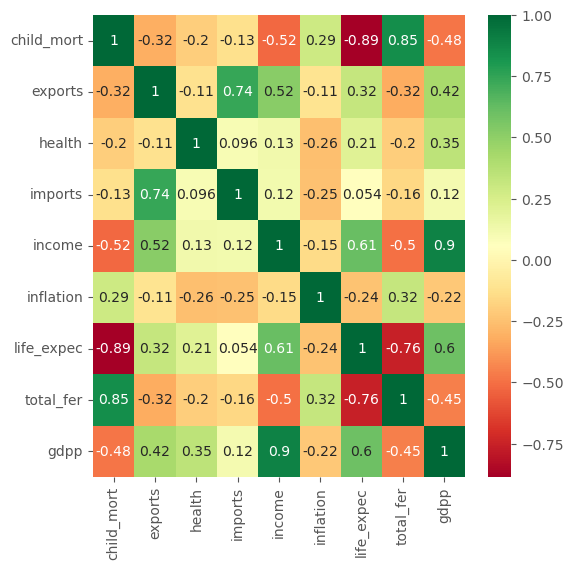

In [13]:
plt.figure(figsize = [6,6])
corr = country.corr()
sns.heatmap(corr,annot = True, cmap = 'RdYlGn')
plt.show()

**Inference :**

- `income` & `gdpp` are highly correlated by `0.89` `Positively`
- `child_mort` & `life_expec` are `Negatively` correlated by `0.88` 
- `child_mort` & `total_fer` are `Positively` correlated `0.85`
- `life_expec` & `total_fer` are `Negatively` correlated by `0.76`
- `exports` & `imports` are `Positively` correlated by `0.73`

**Ploting the Numerical Columns in pairs**

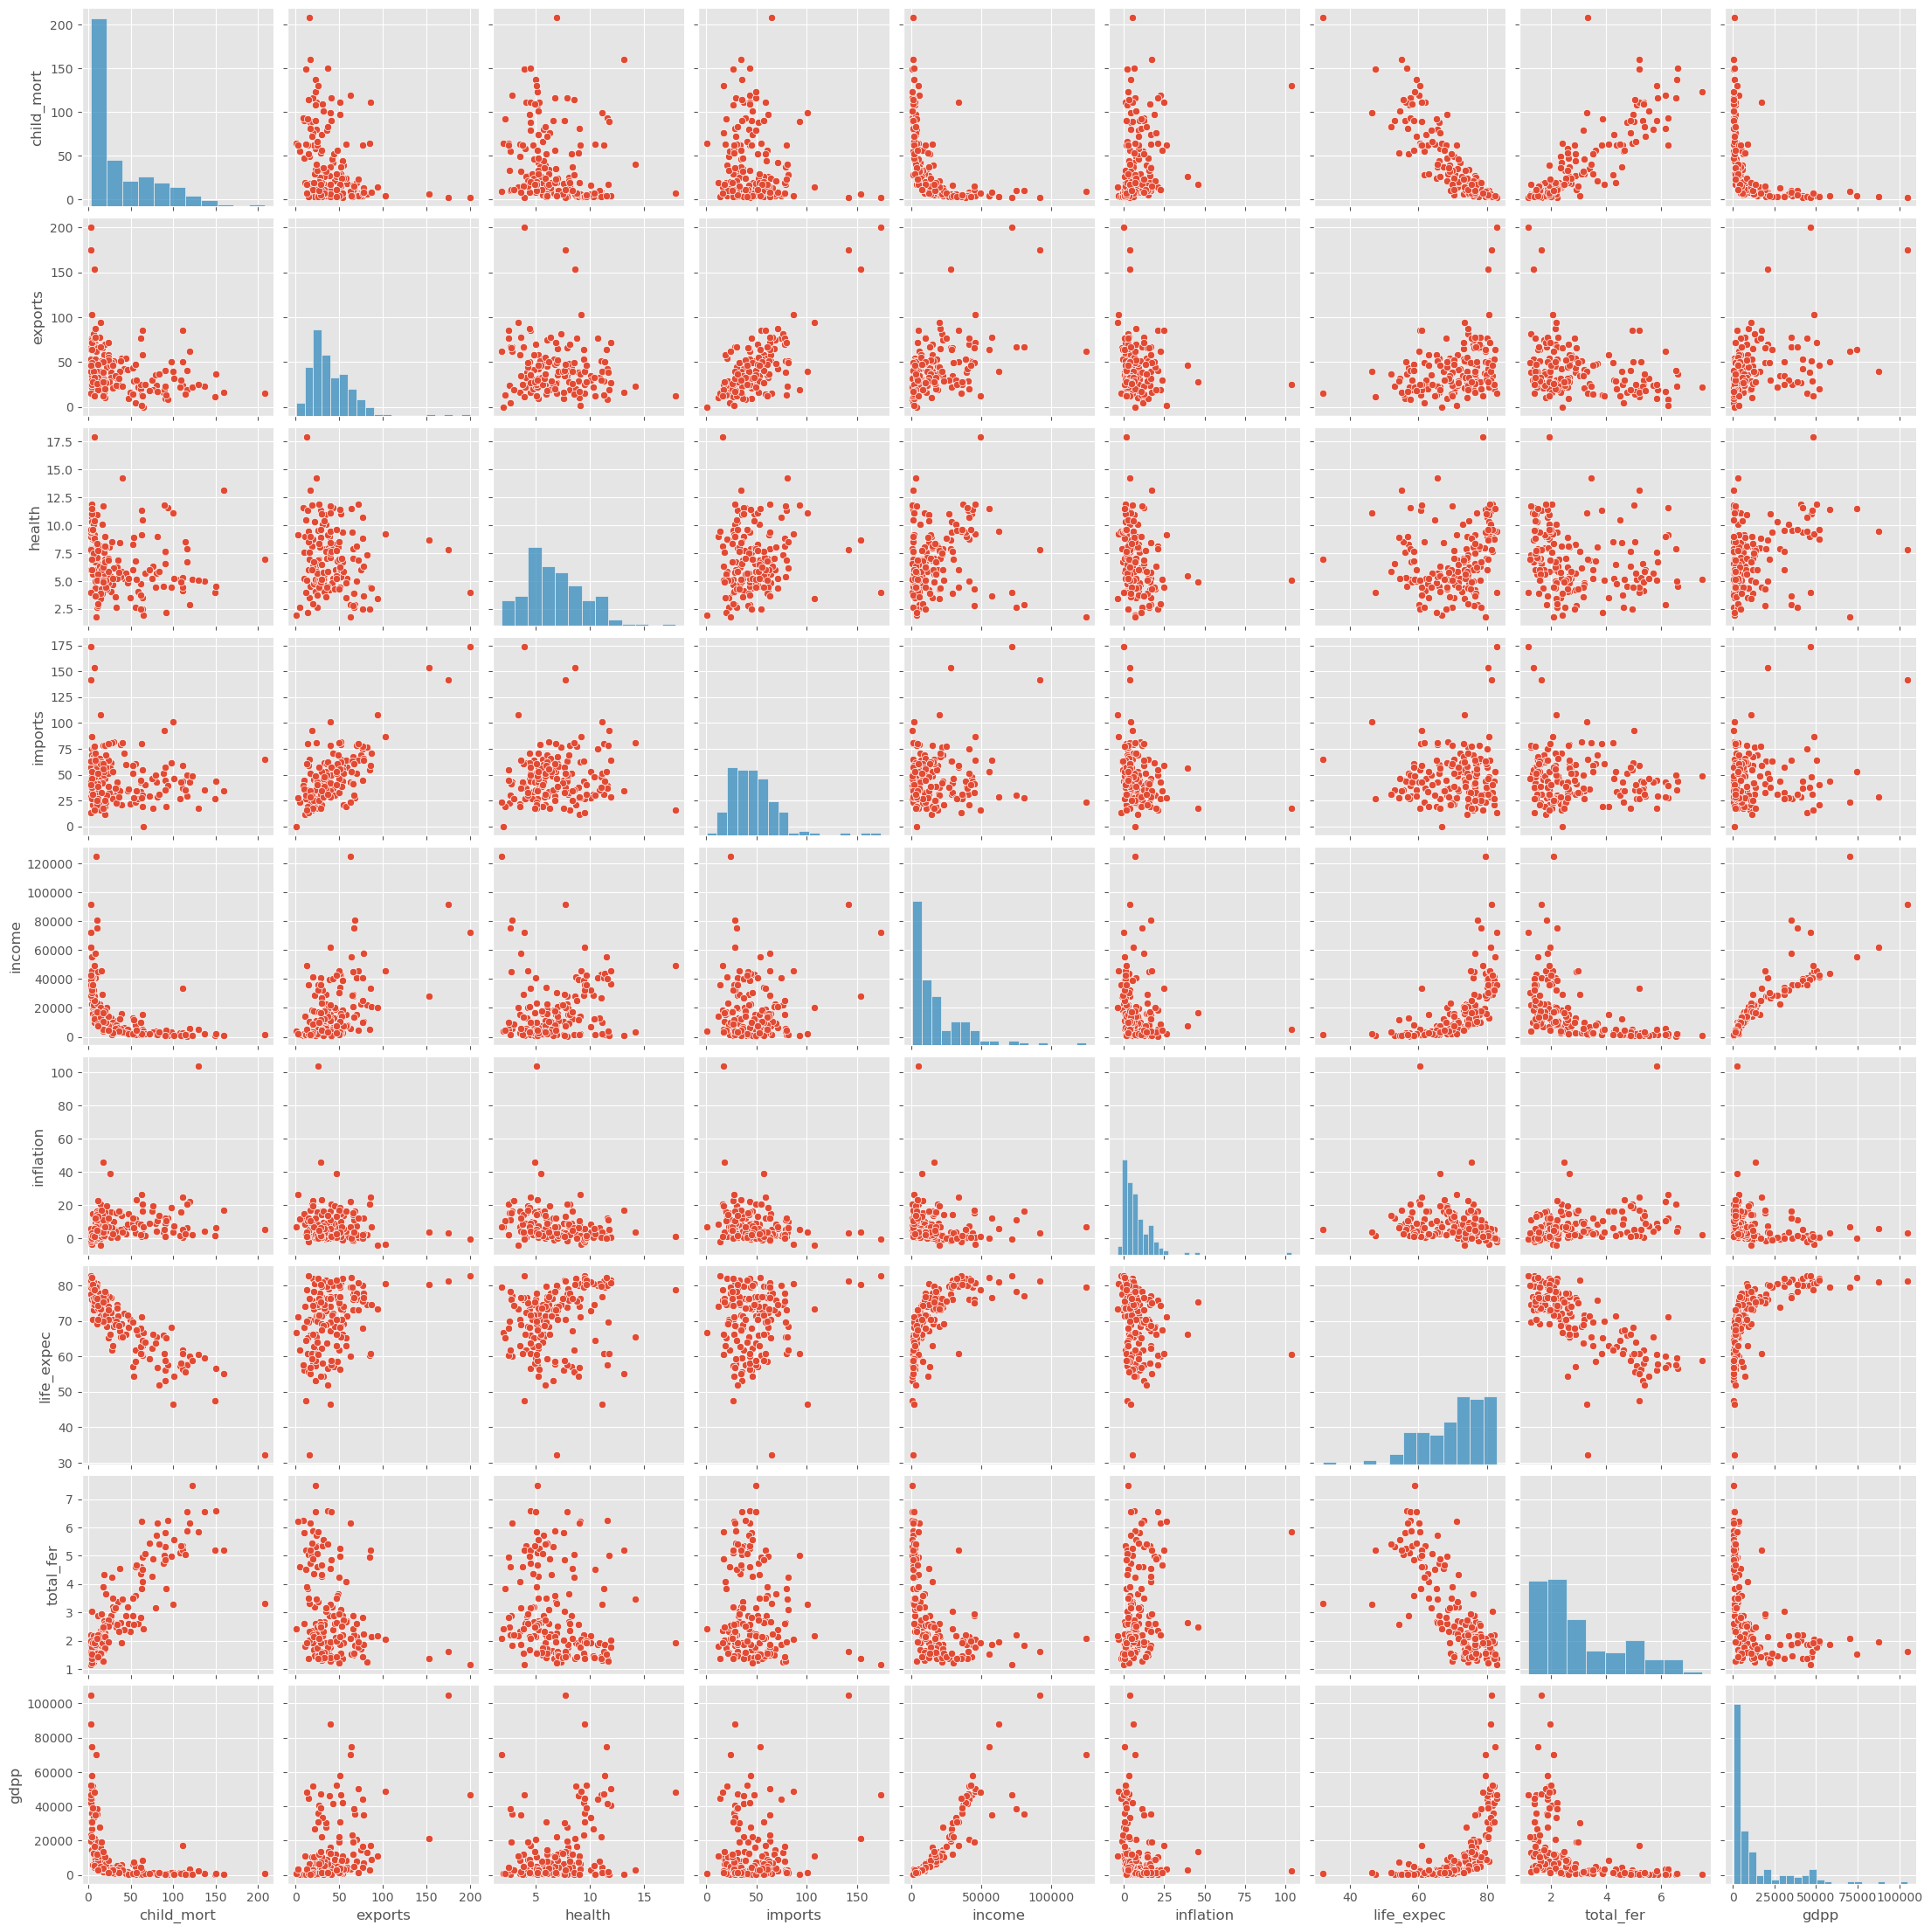

In [14]:
sns.pairplot(country)
plt.show()

## 4. Data Praperation

In [15]:
country.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.3,40.3,2.6,8.2,19.3,62.1,208.0
exports,167.0,41.1,27.4,0.1,23.8,35.0,51.4,200.0
health,167.0,6.8,2.7,1.8,4.9,6.3,8.6,17.9
imports,167.0,46.9,24.2,0.1,30.2,43.3,58.8,174.0
income,167.0,17144.7,19278.1,609.0,3355.0,9960.0,22800.0,125000.0
inflation,167.0,7.8,10.6,-4.2,1.8,5.4,10.8,104.0
life_expec,167.0,70.6,8.9,32.1,65.3,73.1,76.8,82.8
total_fer,167.0,2.9,1.5,1.2,1.8,2.4,3.9,7.5
gdpp,167.0,12964.2,18328.7,231.0,1330.0,4660.0,14050.0,105000.0


**Lets Look at the data dictionary once again**

- `exports` : Exports of goods and services per capita. Given as %age of the GDP per capita
- `imports` : Imports of goods and services per capita. Given as %age of the GDP per capita
- `health` : Total health spending per capita. Given as %age of GDP per capita

**These 3 variables needs to be converted to their absolute values**

### Converting `exports` , `imports` and `health` to absolute values

In [16]:
country['exports'] = country['gdpp']*(country['exports']/100)
country['imports'] = country['gdpp']*(country['imports']/100)
country['health'] = country['gdpp']*(country['health']/100)

In [17]:
## Lets look at the dataframe once again
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [18]:
# spliting the dataframe for feeding into model

country_label = country['country'] # country names
country_features = country.drop('country', axis = 1) # numerical columsn that can be scalled

In [19]:
country_features.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Scaling of features

Two Methods of scaling

    1. Normalisation(MinMax Scaler)
    2. Standardisation(Scandard Scaler)
    
 Since we have the risk of `stastistical-ourliers in the dataset`, lets choose `standard scaler` for scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
## scaling the the features using the standard scaler

sc_arr = scaler.fit_transform(country_features)
sc_arr

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [22]:
# creating a scaled dataframe

sc_country = pd.DataFrame(data = sc_arr, columns = country_features.columns)

In [23]:
# lets look at the statistics of the scaled dataframe

sc_country.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-0.0,1.0,-0.89,-0.75,-0.47,0.59,4.22
exports,167.0,0.0,1.0,-0.41,-0.39,-0.31,-0.01,9.84
health,167.0,-0.0,1.0,-0.58,-0.54,-0.41,-0.04,4.24
imports,167.0,0.0,1.0,-0.45,-0.41,-0.31,0.08,9.72
income,167.0,-0.0,1.0,-0.86,-0.72,-0.37,0.29,5.61
inflation,167.0,0.0,1.0,-1.14,-0.57,-0.23,0.28,9.13
life_expec,167.0,0.0,1.0,-4.34,-0.59,0.29,0.70,1.38
total_fer,167.0,0.0,1.0,-1.19,-0.76,-0.36,0.62,3.01
gdpp,167.0,0.0,1.0,-0.70,-0.64,-0.45,0.06,5.04


## 5. Features Selection

### Principle Component Analysis

**`PCA` helps remove the redundancies in the data** and find the most important directions where the data was aligned.
Principal component analysis (PCA) is one of the most commonly used `dimensionality reduction` techniques in the industry. 

By converting large data sets into smaller ones containing fewer variables, it helps in 

- `improving model performance`, 
- `visualising complex data sets`, and in many more areas.

**Lets Apply PCA for dimensionality reduction as `higher correlations` exist between the attributes in our DataSet**

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(svd_solver='randomized', random_state=42)

In [26]:
# Lets apply PCA on the scaled data
pca.fit(sc_country)

PCA(random_state=42, svd_solver='randomized')

In [27]:
# PCA Components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [28]:
# PCA Variance
pca_variance = pca.explained_variance_ratio_
pca_variance

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [29]:
# Ploting the variance and cumilative variance in a dataframe

pc_label = ['PC'+str(x) for x in range(len(pca_variance))]
pca_df = pd.DataFrame({'variable':pc_label,'variance_explained':pca_variance,'cum_sum':np.cumsum(pca_variance)})

pca_df

,variable,variance_explained,cum_sum
0,PC0,0.589373,0.589373
1,PC1,0.184452,0.773825
2,PC2,0.099115,0.872939
3,PC3,0.060723,0.933662
4,PC4,0.030292,0.963954
5,PC5,0.024598,0.988552
6,PC6,0.009397,0.997950
7,PC7,0.001556,0.999506
8,PC8,0.000494,1.000000


**Plot PCA Component Variance**

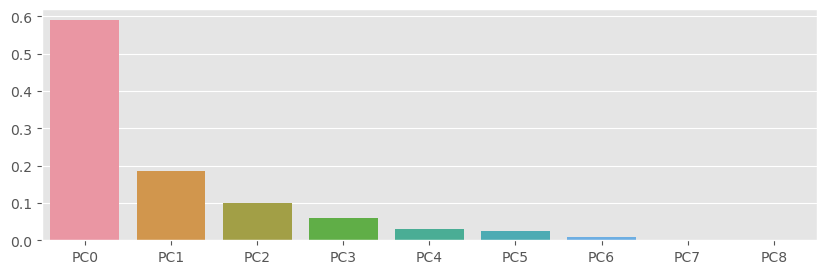

In [30]:
plt.figure(figsize = [10,3])
sns.barplot(x = pc_label,y = pca_variance)
plt.show()

**Plot PCA Component Cumulative Variance**

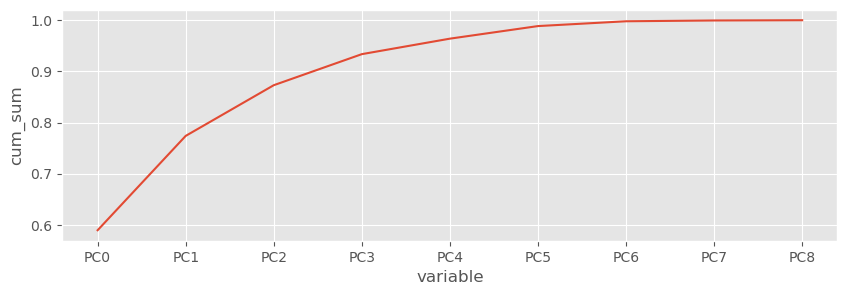

In [31]:
plt.figure(figsize = [10,3])
sns.lineplot( x = pca_df['variable'],y = pca_df['cum_sum'])
plt.show()

**Inferences :**

- The first component(`PC0`) is explaining about `59%` of the variance
- The second component(`PC1`) is explaining about `18%` of the variance
- The third componet is(`PC2`) explaining about `10%` of the variace   

**The combination of first `3 components` explains about `87%` of the varince in the data**

**Hence, we will use these components only, for further processing**

**PCA Components vs All Variables**

In [32]:
# Create a dataframe showing how each princple conponets explains the variance in each variable in the dataset

cols = sc_country.columns
pc0 = pca.components_[0] 
pc1 = pca.components_[1]
pc2 = pca.components_[2]

attributes_pca = pd.DataFrame({'var':cols,'pc0':pc0,'pc1':pc1,'pc2':pc2})
attributes_pca

,var,pc0,pc1,pc2
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


### Principle Component Analysis with variables

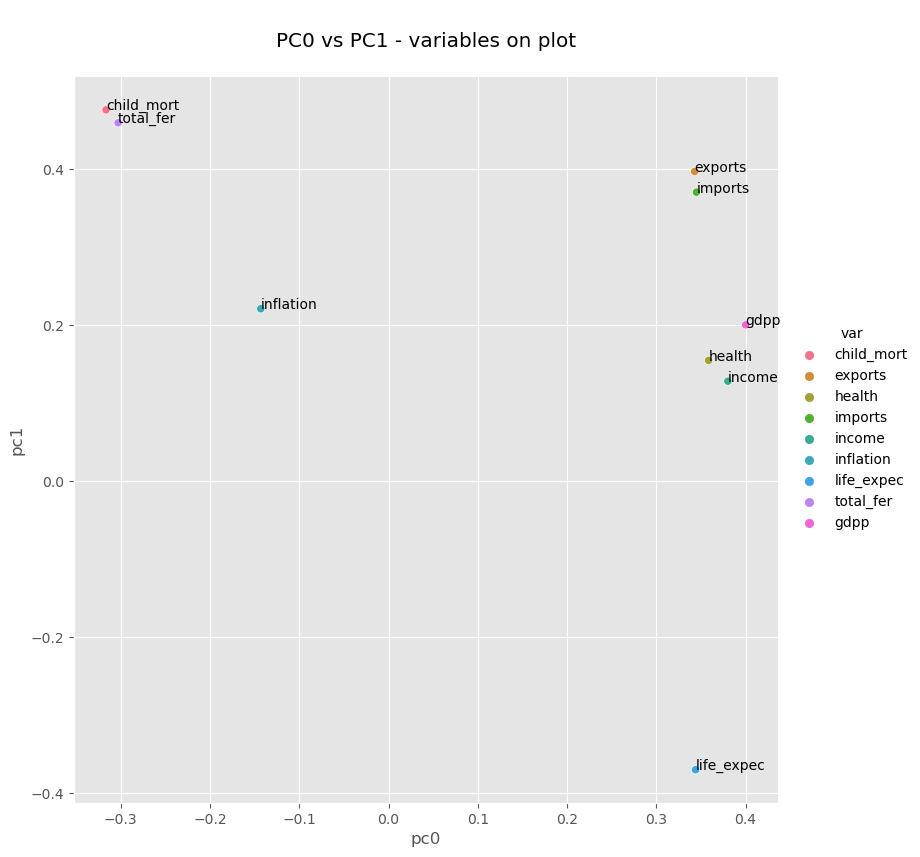

In [33]:
# plot PC0 vs PC1 with varible as hue

sns.pairplot(data=attributes_pca, x_vars=["pc0"], y_vars=["pc1"], hue = "var" ,height=8)
plt.title('\nPC0 vs PC1 - variables on plot\n')

for i,txt in enumerate(attributes_pca['var']):
    plt.annotate(txt, (attributes_pca['pc0'][i],attributes_pca['pc1'][i]))

**Inference :**
    
- `life_exp`, `income`, `health` & `gdpp` are well explained by `PC0`
- `child_mor`, `total_fer` are well explained by `PC1`
- `exports` & `imports` are well explained by both `PC0` & `PC1`
- `inflation` is neither explained by `PC0` & nor by `PC1`

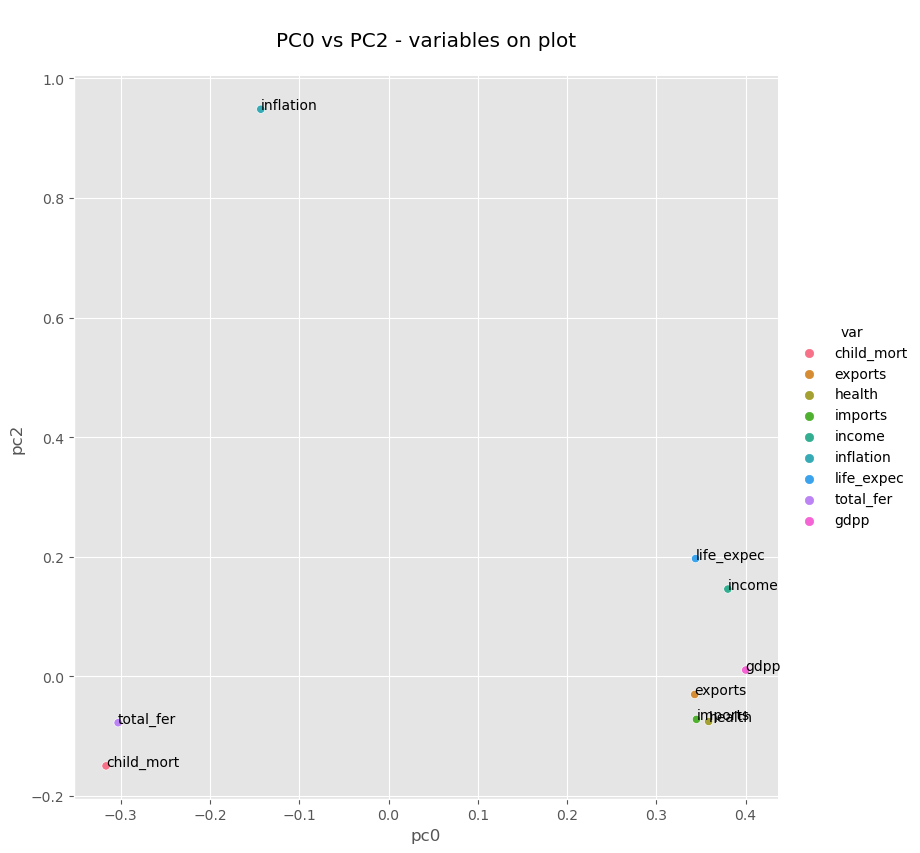

In [34]:
# plot PC0 vs PC2 with varible as hue

sns.pairplot(data=attributes_pca, x_vars=["pc0"], y_vars=["pc2"], hue = "var" ,height=8)
plt.title('\nPC0 vs PC2 - variables on plot\n')
for i,txt in enumerate(attributes_pca['var']):
    plt.annotate(txt, (attributes_pca['pc0'][i],attributes_pca['pc2'][i]))

Inference :
    
- `inflation` is well explained by `PC2`

**Lets Apply incremental PCA**

In [35]:
from sklearn.decomposition import IncrementalPCA

In [36]:
# Building the dataframe using Incremental PCA with 3 components

inc_pca = IncrementalPCA(n_components=3)

In [37]:
# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(sc_country)

In [38]:
# Creating new dataframe with Principal components for each record

df_pca = pd.DataFrame(df_inc_pca, columns = ['PC0', 'PC1','PC2'])
df_pca_final = pd.concat([country_label, df_pca], axis=1)
df_pca_final.head()

,country,PC0,PC1,PC2
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


**Lets check the correlations in PCA_datafreme if any**

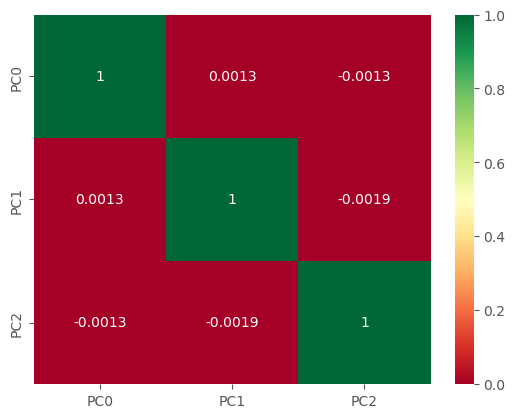

In [39]:
corr = df_pca.corr()
sns.heatmap(corr, annot = True, cmap = 'RdYlGn')
plt.show()

**Inference** 

- There is no corralation between any PC components, which is very good

**Pairplot the PCA's**

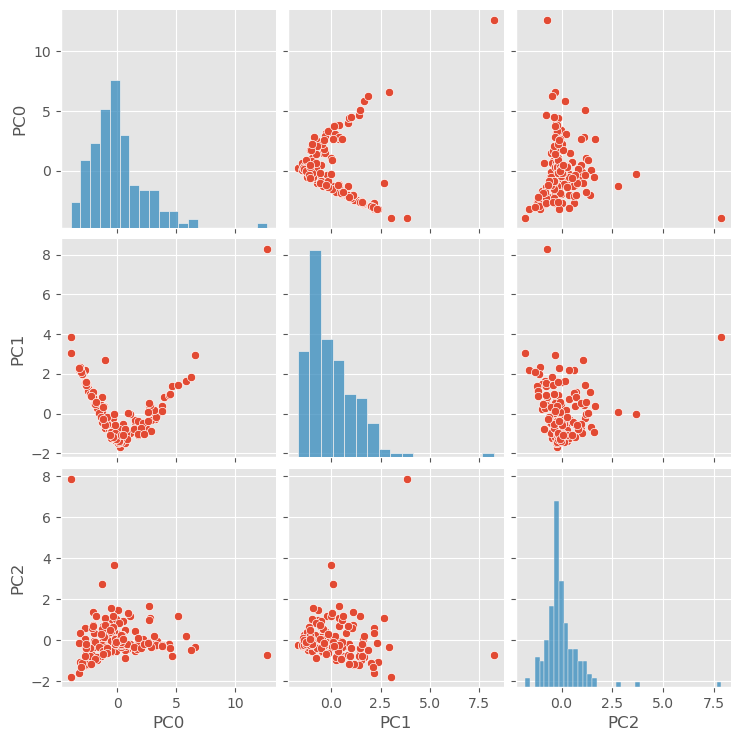

In [40]:
sns.pairplot(data = df_pca)
plt.show()

### Outliers Distribution

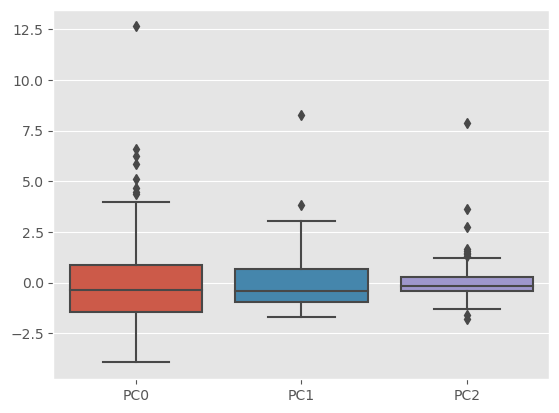

In [41]:
# Lets plot the data distribution of 3 Principle Components
sns.boxplot(data = df_pca_final)
plt.show()

**IQR of variables**

In [42]:
# Lets get the Q1 & Q3 of all the principle components
# Lets Q1 = 5th Percentile & Q3 = 99th Percentile

Q1_PC0 = df_pca_final['PC0'].quantile(0.05)
Q3_PC0 = df_pca_final['PC0'].quantile(0.99)

Q1_PC1 = df_pca_final['PC1'].quantile(0.05)
Q3_PC1 = df_pca_final['PC1'].quantile(0.99)

Q1_PC2 = df_pca_final['PC2'].quantile(0.05)
Q3_PC2 = df_pca_final['PC2'].quantile(0.99)

**Outliers Treatment options**

- `Remove all records havings outliers`
- `Cap the variables with Q1 & Q3 values`
- `leave outliers as it is`

**We choose `Capping` the outliers with Q1 & Q3 values,**

**Because we dont want any countries be removed from the dataframe and we need all the countries needs to be clustered as well**

In [43]:
# Apply capping of values to all the principle components

df_pca_final['PC0'] = df_pca_final['PC0'].apply(lambda x : Q1_PC0 if x < Q1_PC0 else Q3_PC0 if x > Q3_PC0 else x)
df_pca_final['PC1'] = df_pca_final['PC1'].apply(lambda x : Q1_PC1 if x < Q1_PC1 else Q3_PC1 if x > Q3_PC1 else x)
df_pca_final['PC2'] = df_pca_final['PC2'].apply(lambda x : Q1_PC2 if x < Q1_PC2 else Q3_PC2 if x > Q3_PC2 else x)

**ploting the varibles after removing the outliers**

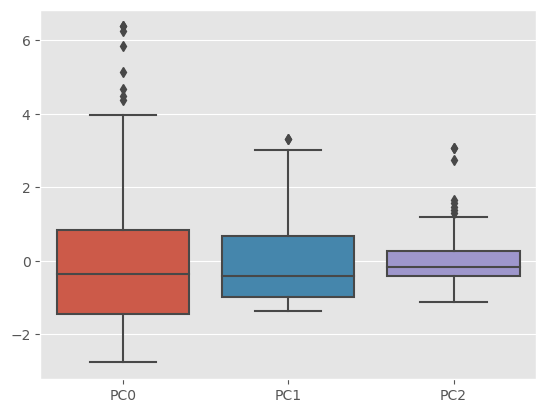

In [44]:
sns.boxplot(data = df_pca_final)
plt.show()

**Producing the Dataframe (with reduced dimentions) for Modeling**

In [45]:
country_label = df_pca_final['country'] # country nammes
country_model = df_pca_final[['PC0','PC1','PC2']] # modeling features

## Hopkins Test

#### User Defined Funnction for Hoipkins test

In [46]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [47]:
h_list = []

for i in range(50): # iterate 50 times - since hopkins score is little bit inconstitent
    h = hopkins(country_model)
    h_list.append(h)
    
np.mean(h_list).round(2)

0.85

**Inference :**
    
- `Good Hopkins` score for `clustering`

## 6. Model Building

- KMeans Clustering

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Finding the SSD & Silhouette Values for a Range of K's

- `Elbow Curve`
- `Silhoutte Analysis`

Silhouette Analysis ineterpretation


* The value of the silhouette score range lies between -1 to 1. 
* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 
* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

**Compute the values for ssd & silhouette**

In [49]:
ssd_list = []
silh_list = []
ks = [2,3,4,5,6,7,8,9,10]

for k in ks:
    kmeans = KMeans(n_clusters = k, max_iter = 50, random_state = 100)
    kmeans.fit(country_model)
    
    ssd = kmeans.inertia_
    labels = kmeans.labels_
    silh = silhouette_score(X = country_model,labels=labels)
    
    ssd_list.append(ssd)
    silh_list.append(silh)

**Elbow Curve**

ploting the ssd curve

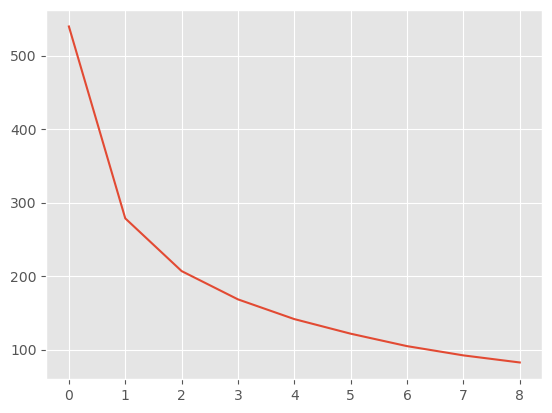

In [50]:
plt.plot(ssd_list)
plt.show()

**K's with ssd & silhouette score Table**

In [51]:
k_matrix = pd.DataFrame({'k':ks, 'ssd': ssd_list,'silh':silh_list})
k_matrix.round(2)

,k,ssd,silh
0,2,539.55,0.50
1,3,278.58,0.49
2,4,206.85,0.48
3,5,168.37,0.40
4,6,141.54,0.42
5,7,121.68,0.38
6,8,104.77,0.39
7,9,92.18,0.37
8,10,82.54,0.37


**Inference :** 

- Looking at the `Elbow curve` (ssd) and `silhouette score`, `4` or `5` clusters could be ideal in this problem

### Initialising the KMeans Models

**Model with K = 4**

In [52]:
optimum_k = 4

In [53]:
kmeans = KMeans(n_clusters = optimum_k, max_iter = 50, random_state = 100) # initialising the kmeans object
kmeans.fit(country_model) # fitting the features in kmeans object

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [54]:
# arriving at the cluster_labels

country_clusters = kmeans.labels_ 
country_clusters

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       3, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 3, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       3, 1, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 3, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [55]:
# Assigning the cluster labels to the dataframe

df_pca_final['cluster_k4'] = country_clusters
df_pca_final.head()

,country,PC0,PC1,PC2,cluster_k4
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Albania,-0.022277,-1.349882,-0.020701,2
2,Algeria,-0.457626,-0.673301,0.961867,2
3,Angola,-2.724520,2.174583,0.606687,0
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2


**User Defined Function for simple stats**

In [56]:
def simple_stat(df,var):
    count = df[var].value_counts()
    dist = df[var].value_counts(normalize = True)*100
    stat = pd.concat([count,dist], axis = 1).reset_index()
    stat.columns = [df[var].name,'count','%distri.']
    return stat.round(0)

**User Defined Function for simple barplot**

In [57]:
def simple_barplot(df,var):
    s = df[var].value_counts(normalize = True)*100
    plt.figure(figsize = [5,3])
    sns.barplot(x = s.index, y = s)
    plt.show() 

**User Defined Function for simple Scatterplot**

In [58]:
def simple_scatterplot(df,var0,var1,var2,clust_var):
    
    fig, axes = plt.subplots(1,2, figsize=(15,3))

    sns.scatterplot(data = df ,x = var0,y = var1 , hue = clust_var, legend='full', palette="Set1", ax=axes[0])
    sns.scatterplot(data = df ,x = var0,y = var2 , hue = clust_var, legend='full', palette="Set1", ax=axes[1])

    plt.show()

**Simple Statistics on created Model -- K = 4**

In [59]:
simple_stat(df = df_pca_final, var = 'cluster_k4')

,cluster_k4,count,%distri.
0,2,82,49.0
1,0,48,29.0
2,1,28,17.0
3,3,9,5.0


**Simple Plot on created Model -- K = 4**

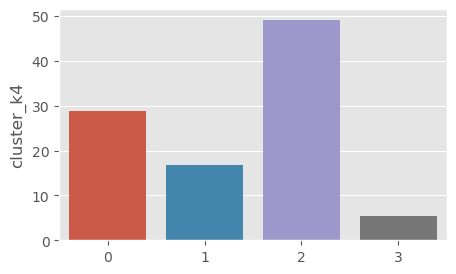

In [60]:
simple_barplot(df = df_pca_final, var = 'cluster_k4')

**Simple Scatter Plot on created Model -- K = 4**

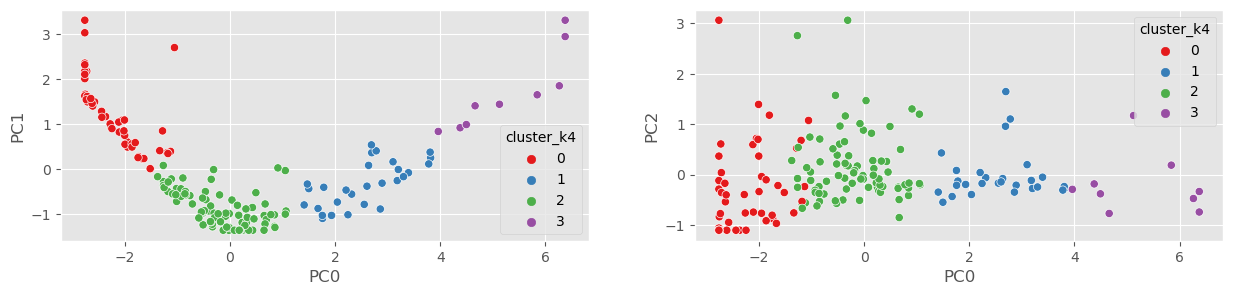

In [61]:
simple_scatterplot(df = df_pca_final,var0 = 'PC0', var1 = 'PC1', var2 = 'PC2',clust_var = 'cluster_k4')

**Inference : **

- The plots show a lot of `intra-cluster distance` which is not good for clustering

**Model with K = 5**

In [62]:
optimum_k = 5

In [63]:
kmeans = KMeans(n_clusters = optimum_k, max_iter = 50, random_state = 100)
kmeans.fit(country_model)

KMeans(max_iter=50, n_clusters=5, random_state=100)

In [64]:
country_clusters = kmeans.labels_
country_clusters

array([4, 1, 1, 4, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 3, 1, 4, 1, 0, 1, 0,
       1, 2, 1, 4, 4, 0, 4, 2, 1, 4, 4, 1, 1, 1, 0, 4, 4, 1, 4, 1, 2, 2,
       3, 1, 1, 0, 1, 4, 0, 1, 0, 2, 2, 0, 4, 1, 2, 0, 2, 1, 0, 4, 4, 0,
       4, 1, 2, 0, 0, 1, 0, 3, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 1, 4,
       4, 1, 1, 3, 1, 0, 4, 1, 1, 4, 2, 4, 1, 0, 1, 0, 1, 1, 4, 0, 0, 0,
       3, 2, 4, 4, 3, 1, 0, 1, 1, 1, 0, 1, 2, 3, 1, 1, 0, 0, 1, 0, 1, 1,
       4, 3, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 3, 0, 4, 1, 4, 4, 0, 1, 1,
       0, 4, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 4], dtype=int32)

In [65]:
df_pca_final['cluster_k5'] = country_clusters
df_pca_final.head()

,country,PC0,PC1,PC2,cluster_k4,cluster_k5
0,Afghanistan,-2.637442,1.469038,-0.541359,0,4
1,Albania,-0.022277,-1.349882,-0.020701,2,1
2,Algeria,-0.457626,-0.673301,0.961867,2,1
3,Angola,-2.724520,2.174583,0.606687,0,4
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2,1


**Simple Statistics on created Model -- K = 5**

In [66]:
simple_stat(df = df_pca_final, var = 'cluster_k5')

,cluster_k5,count,%distri.
0,1,61,37.0
1,0,39,23.0
2,4,30,18.0
3,2,28,17.0
4,3,9,5.0


**Simple Plot on created Model -- K = 5**

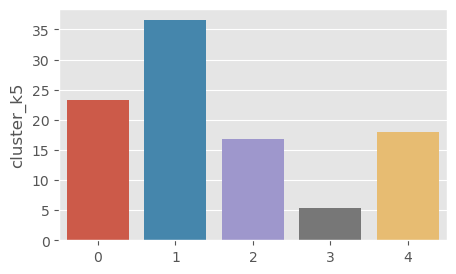

In [67]:
simple_barplot(df = df_pca_final, var = 'cluster_k5')

**Simple Scatter Plot on created Model -- K = 5**

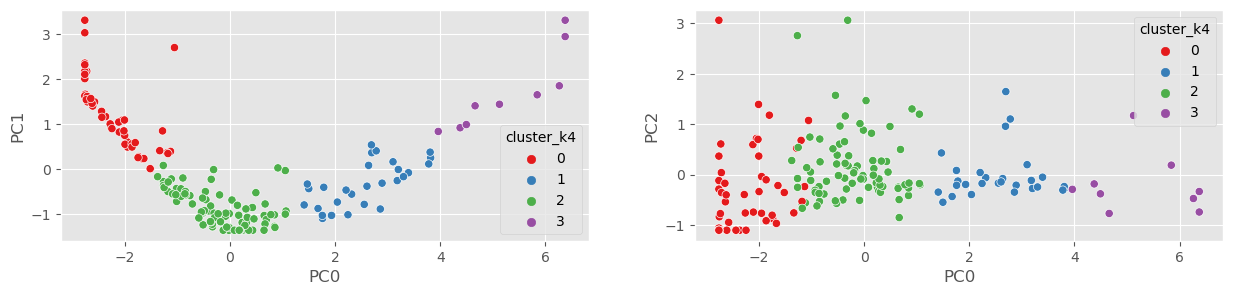

In [68]:
simple_scatterplot(df = df_pca_final,var0 = 'PC0', var1 = 'PC1', var2 = 'PC2',clust_var = 'cluster_k4')

**Inference:**

- we can still see some `intra-cluster distance` in this model also which is not prefered for clustering, 
- But we got `5 nos of good-clusters` which is a positive in this model

### Lets visualize the `Original Attributes` of based on the model K = 5

In [69]:
# Lets merge the clusters with Original DataFrame

counntry_clustered = country.merge(right = df_pca_final, on = 'country', how = 'left')
counntry_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC0,PC1,PC2,cluster_k4,cluster_k5
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637442,1.469038,-0.541359,0,4
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.022277,-1.349882,-0.020701,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.457626,-0.673301,0.961867,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.724520,2.174583,0.606687,0,4
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649849,-1.024374,-0.250103,2,1


From the business understanding we have learnt that,

- `Child_Mortality` 
- `Income` 
- `Gdpp` 

are some important factors which decides the development of any country. 

**Lets Visualise in a PairPlot**

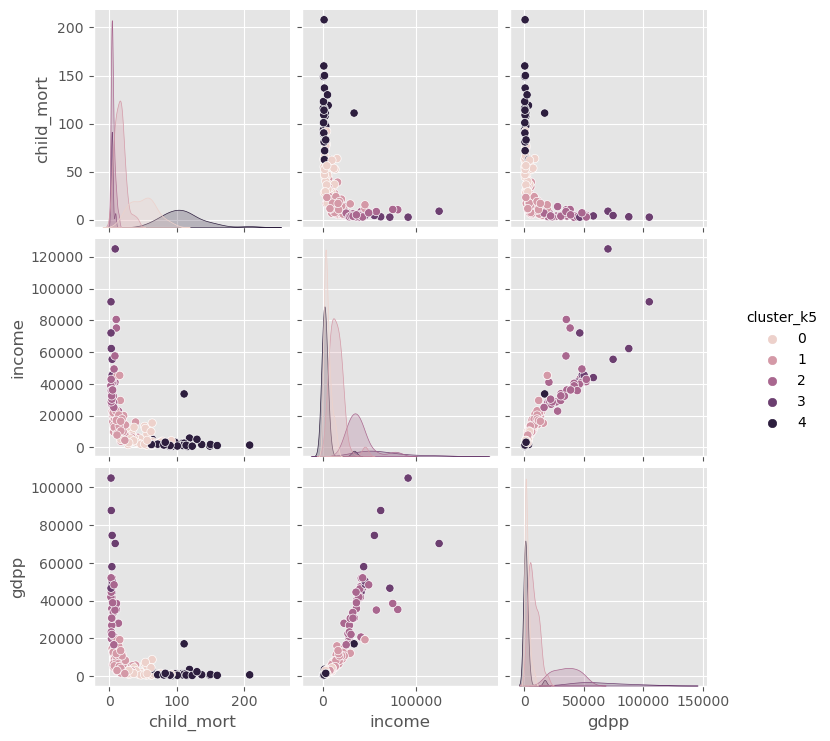

In [70]:
sel_cols = ['child_mort','income','gdpp','cluster_k5']

sns.pairplot(counntry_clustered[sel_cols], kind = 'scatter', hue = 'cluster_k5')
plt.show()

**Lets Visualise in a BoxPlot**

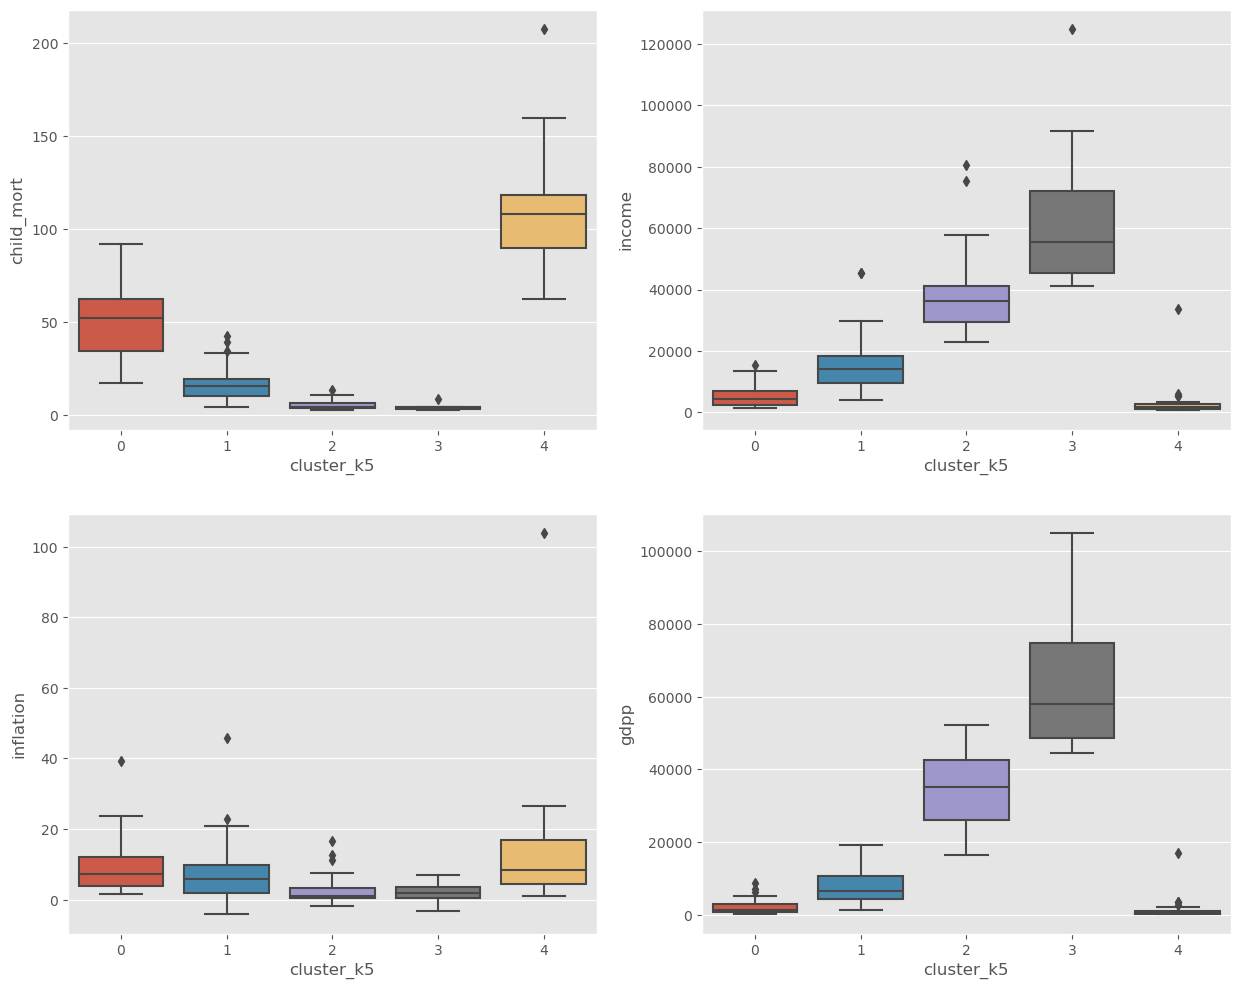

In [71]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'cluster_k5', y = 'child_mort', data = counntry_clustered,ax=axes[0][0])
sns.boxplot(x = 'cluster_k5', y = 'income', data = counntry_clustered,ax=axes[0][1])
sns.boxplot(x = 'cluster_k5', y = 'inflation', data=counntry_clustered,ax=axes[1][0])
sns.boxplot(x = 'cluster_k5', y = 'gdpp', data=counntry_clustered,ax=axes[1][1])
plt.show()

**Compute the Mean-value of each varible in each cluster**

In [72]:
sel_cols = ['child_mort','income','gdpp','inflation']

cols_dict = { x+'_mean':x for x in sel_cols }

mean_dict = {}

for mean_name,col_name in cols_dict.items():

    mean_dict[mean_name] = counntry_clustered.groupby('cluster_k5')[col_name].mean()
    
mean_df = pd.DataFrame(mean_dict).reset_index()
mean_df.round(0)

,cluster_k5,child_mort_mean,income_mean,gdpp_mean,inflation_mean
0,0,50.0,5193.0,2360.0,9.0
1,1,16.0,14775.0,7686.0,7.0
2,2,6.0,38721.0,34718.0,3.0
3,3,4.0,64767.0,65078.0,2.0
4,4,109.0,3077.0,1544.0,13.0


**Plotting The Mean values in each Cluster**

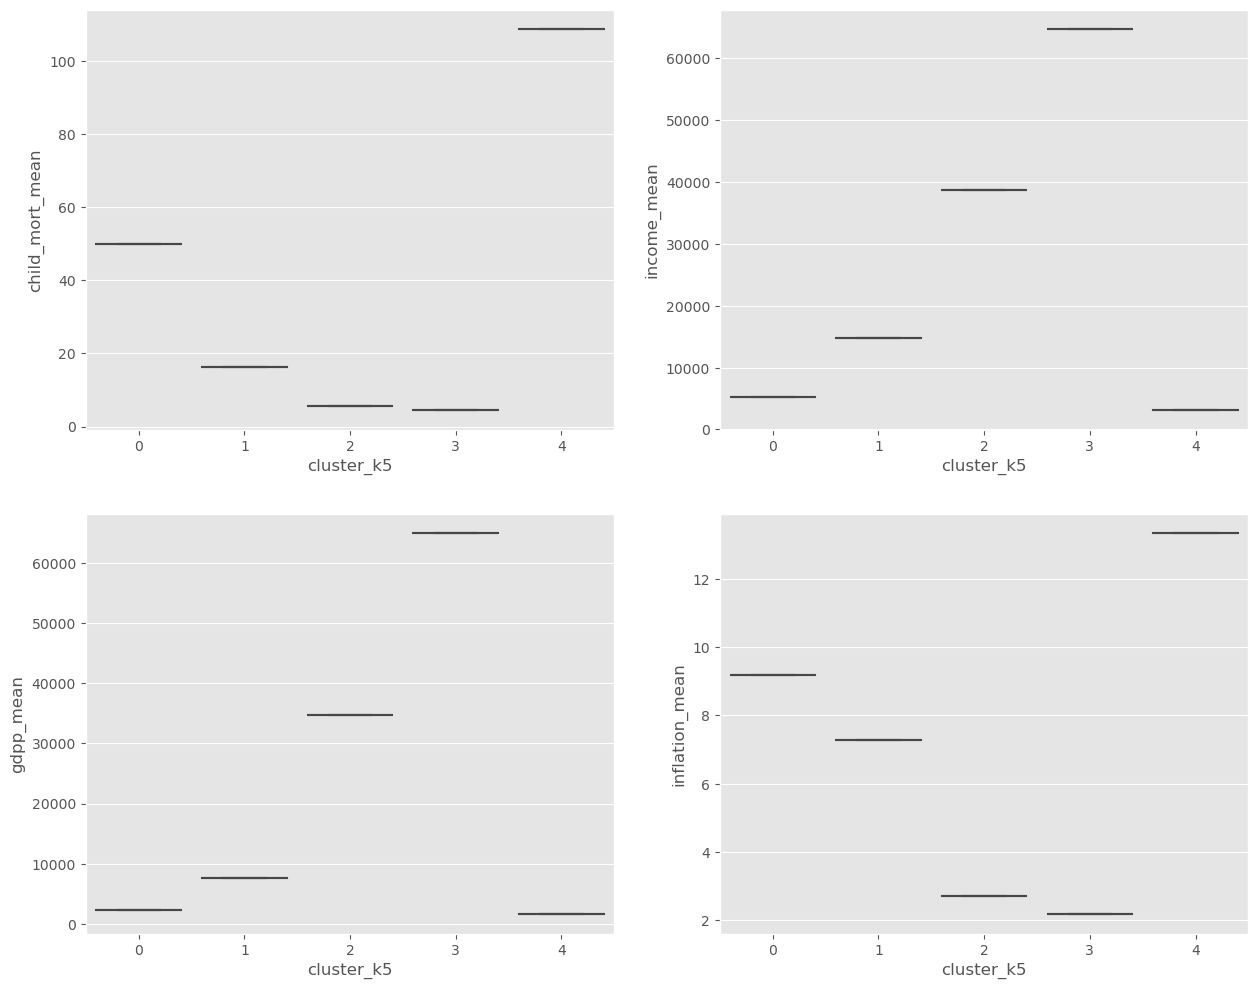

In [73]:
# Box plot to visualise the mean value of few original attributes.

fig, axes = plt.subplots(2,2, figsize=(15,12))

for ind,var in enumerate(list(cols_dict.keys())):
    
    r =  ind//2
    c = ind%2
    sns.boxplot(x = 'cluster_k5', y = var, data = mean_df,ax=axes[r][c])

plt.show()

**Inference :**

`Cluster 4` :

    - higher child mortality
    - low income
    - low gdpp
    - high inflation
`Cluster 0` : 

    - moderate child mortality
    - low income 
    - low gdpp
    - moderate infaltion level
    
**This model looks Good**

**Still Lets try Heirarchial Clustering also and compare the results**

### Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom.

There are two types of hierarchical clustering

- Divisive
- Agglomerative.

**Single Linkage:<br>**

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.
![](https://www.saedsayad.com/images/Clustering_single.png)

In [74]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

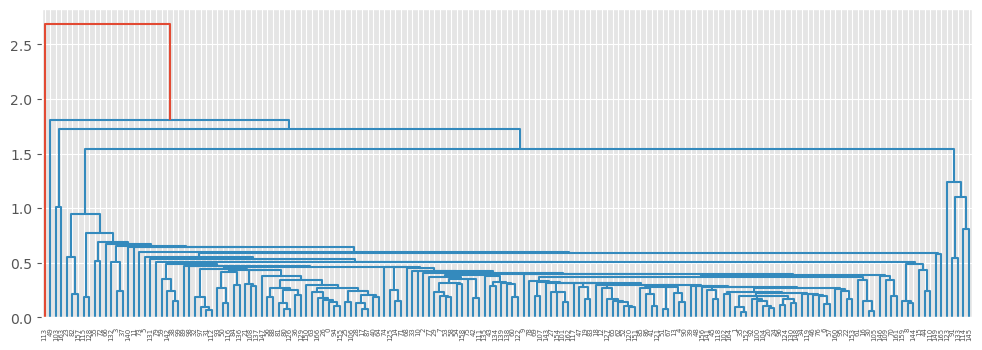

In [75]:
mergings = linkage(country_model, method='single',metric='euclidean')
plt.figure(figsize = [12,4])
dendrogram(mergings)
plt.show()

**Inference :**

The single linkage is prefered in practical scenarios as they tend measure the distance between the nearest point between clusters.

**Complete Linkage<br>**

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points. 
![](https://www.saedsayad.com/images/Clustering_complete.png)

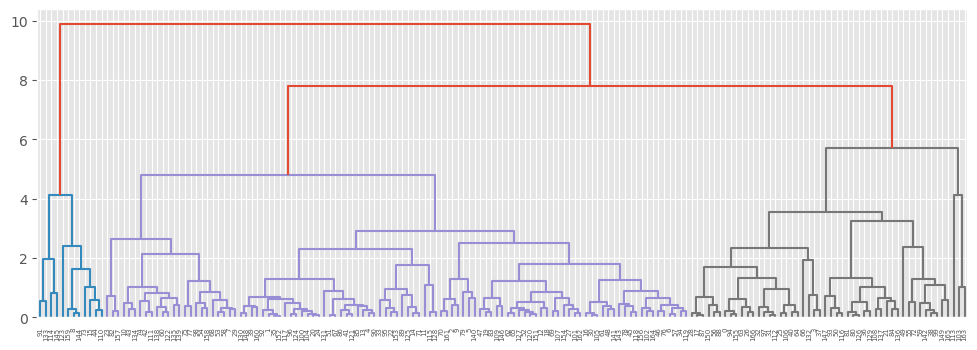

In [76]:
mergings = linkage(country_model, method='complete',metric='euclidean')
plt.figure(figsize = [12,4])
dendrogram(mergings)
plt.show()

In [77]:
# Let cut the tree at height of approx 4 to get 4 clusters and see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_hc = pd.concat([country_label,country_model, clusterCut], axis=1)
df_hc.columns = ['country', 'PC0', 'PC1','PC2','cluster_h']

**Simple Statistics on created Model -- Hierarchical Clustering with clusters = 4**

In [78]:
simple_stat(df = df_hc, var = 'cluster_h')

,cluster_h,count,%distri.
0,1,105,63.0
1,0,47,28.0
2,2,12,7.0
3,3,3,2.0


**Simple Barplot on created Model -- Hierarchical Clustering with clusters = 4**

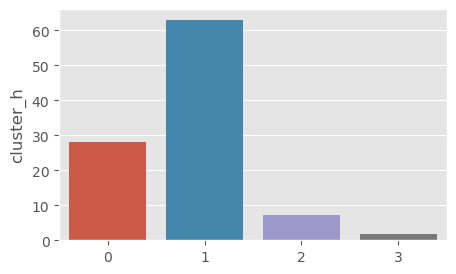

In [79]:
simple_barplot(df = df_hc, var = 'cluster_h')

**Simple Scatterplot on created Model -- Hierarchical Clustering with clusters = 4**

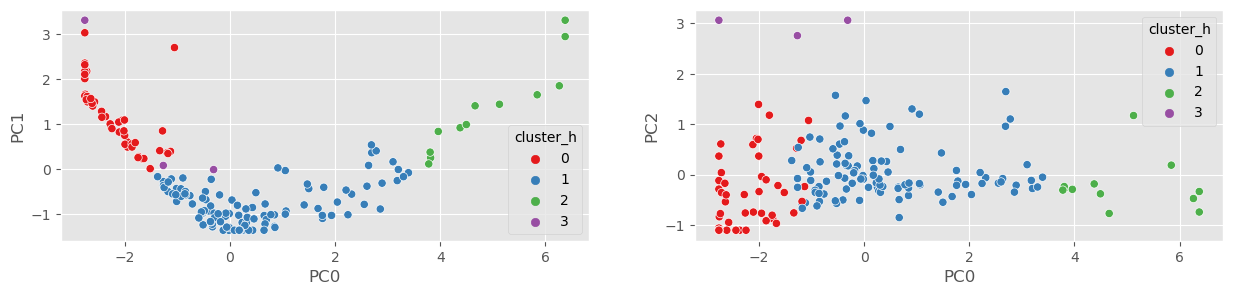

In [80]:
simple_scatterplot(df = df_hc,var0 = 'PC0', var1 = 'PC1', var2 = 'PC2',clust_var = 'cluster_h')

**Inference :**
    
  - We can see the similar issue (`intra-cluster distrance`) what we had in the KMeans clstering with K = 4

In [81]:
df_merge_hc = pd.merge(country,df_hc,on='country', how = 'left')

In [82]:
df_merge_hc['cluster_h'] = df_merge_hc['cluster_h']
df_merge_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC0,PC1,PC2,cluster_h
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637442,1.469038,-0.541359,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.022277,-1.349882,-0.020701,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.457626,-0.673301,0.961867,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.724520,2.174583,0.606687,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649849,-1.024374,-0.250103,1


**Pairplot on features with hue = Hierarchial clusters**

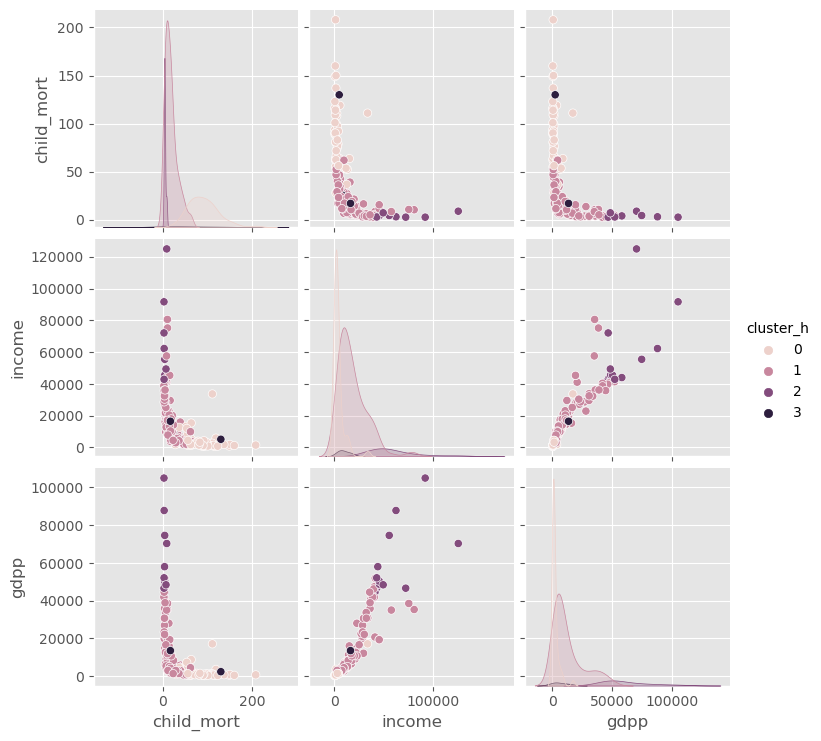

In [83]:
sel_cols = ['child_mort','income','gdpp','cluster_h']

sns.pairplot(df_merge_hc[sel_cols], kind = 'scatter', hue = 'cluster_h')
plt.show()

## 6. Choosing the Best Model

- We have analyzed both `K-means` and `Hierarchial clustering` and found clusters formed are not identical.
- The clusters formed in both the cases are not that great but `its better in K-means` as compared to Hierarchial.
- Hence, we will proceed with the clusters formed by `K-means with k = 5` and based on the information provided by the final clusters**
- We will `deduce the final list of countries` which are in need of aid.

### Final Analysis

- We choose `KMeans Model with k = 5`
- It is obviouse that we need to choose `cluster 4` & `cluster 0` are the be considered for further proceedings

**Attributes of Selected Clusters :**

`Cluster 4` :

    - higher child mortality
    - low income
    - low gdpp
    - high inflation
`Cluster 0` : 

    - moderate child mortality
    - low income 
    - low gdpp
    - moderate infaltion level

**Cluster 4**

In [84]:
# List out cluster4
cluster4 = counntry_clustered[counntry_clustered['cluster_k5'] == 4]
print(cluster4.shape)
cluster4.head()

(30, 15)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC0,PC1,PC2,cluster_k4,cluster_k5
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.637442,1.469038,-0.541359,0,4
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,-2.724520,2.174583,0.606687,0,4
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,-2.365987,1.168460,-1.105714,0,4
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,-2.753874,1.662328,-0.838531,0,4
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,-2.761010,1.627038,-0.289502,0,4


**Cluster 0**

In [85]:
# List out cluster0
cluster0 = counntry_clustered[counntry_clustered['cluster_k5'] == 0]
print(cluster0.shape)
cluster0.head()

(39, 15)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC0,PC1,PC2,cluster_k4,cluster_k5
12,Bangladesh,49.4,121.280,26.6816,165.244,2440,7.14,70.4,2.33,758,-1.014199,-0.711808,-0.116989,2,0
19,Bolivia,46.6,815.760,95.8320,679.140,5410,8.78,71.6,3.20,1980,-1.017781,-0.426144,0.051647,2,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.92,57.1,2.88,6350,-1.130959,0.396783,-0.239304,0,0
27,Cambodia,44.4,425.226,44.6448,467.670,2520,3.12,66.1,2.88,786,-1.179294,-0.493714,-0.579293,2,0
36,Comoros,88.2,126.885,34.6819,397.573,1410,3.87,65.9,4.75,769,-1.949912,0.604587,-0.768860,0,0


**Lets Combine Cluster 4 & Cluster 0**

In [86]:
combined_clusters = pd.concat([cluster4,cluster0], axis = 0)
print(combined_clusters.shape)
combined_clusters.head()

(69, 15)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC0,PC1,PC2,cluster_k4,cluster_k5
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.637442,1.469038,-0.541359,0,4
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,-2.724520,2.174583,0.606687,0,4
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,-2.365987,1.168460,-1.105714,0,4
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,-2.753874,1.662328,-0.838531,0,4
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,-2.761010,1.627038,-0.289502,0,4


In [87]:
# Lets see statstical summary of the arrived dataframe
combined_clusters.describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
child_mort,69.0,76.0,38.0,17.0,47.0,64.0,100.0,208.0
exports,69.0,862.0,1921.0,1.0,110.0,305.0,730.0,14672.0
health,69.0,116.0,146.0,13.0,37.0,57.0,121.0,766.0
imports,69.0,904.0,1359.0,1.0,215.0,428.0,1182.0,10072.0
income,69.0,4273.0,4869.0,609.0,1540.0,2660.0,5190.0,33700.0
inflation,69.0,11.0,14.0,1.0,4.0,8.0,15.0,104.0
life_expec,69.0,62.0,7.0,32.0,58.0,62.0,67.0,72.0
total_fer,69.0,4.0,1.0,2.0,3.0,5.0,5.0,7.0
gdpp,69.0,2005.0,2518.0,231.0,595.0,1170.0,2740.0,17100.0
PC0,69.0,-2.0,1.0,-3.0,-3.0,-2.0,-1.0,-1.0


**Since the list is a bit longer**

Lets choose -

- `child_mort`
- `income`

for deducing with list based on the mean values of listed contries 

**Deduce the list - select countries with higher child mortalilty than average child mortality**

In [88]:
# lets print the mean child mortality of the arrived list of countries
child_mort_mean = combined_clusters['child_mort'].mean()
round(child_mort_mean,1)

75.5

In [89]:
# Selecting the coutries with child mortality > mean of child mortality
cluster_shortlist1 = combined_clusters[combined_clusters['child_mort'] > child_mort_mean]
print(cluster_shortlist1.shape)
cluster_shortlist1.head()

(31, 15)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC0,PC1,PC2,cluster_k4,cluster_k5
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.637442,1.469038,-0.541359,0,4
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,-2.724520,2.174583,0.606687,0,4
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,-2.365987,1.168460,-1.105714,0,4
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,-2.753874,1.662328,-0.838531,0,4
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,-2.761010,1.627038,-0.289502,0,4


**Deduce the list Again - select countries with lesser income than the average income**

In [90]:
# lets print the mean income of the arrived list of countries
income_mean = cluster_shortlist1['income'].mean()
round(income_mean,0)

3104.0

In [91]:
# Selecting the coutries with income > mean of income
cluster_shortlist2 = cluster_shortlist1[cluster_shortlist1['income'] <= income_mean]
print(cluster_shortlist2.shape)
cluster_shortlist2.head()

(23, 15)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC0,PC1,PC2,cluster_k4,cluster_k5
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.637442,1.469038,-0.541359,0,4
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,-2.365987,1.168460,-1.105714,0,4
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,-2.753874,1.662328,-0.838531,0,4
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,-2.761010,1.627038,-0.289502,0,4
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,-2.441429,1.283682,-1.105714,0,4


**Assigning the final list of contries**

In [92]:
final_list = cluster_shortlist2.reset_index(drop=True)
final_list.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC0,PC1,PC2,cluster_k4,cluster_k5
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.637442,1.469038,-0.541359,0,4
1,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,-2.365987,1.168460,-1.105714,0,4
2,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,-2.753874,1.662328,-0.838531,0,4
3,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,-2.761010,1.627038,-0.289502,0,4
4,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,-2.441429,1.283682,-1.105714,0,4


In [93]:
final_list.describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
child_mort,23.0,114.0,30.0,80.0,90.0,109.0,120.0,208.0
exports,23.0,165.0,141.0,21.0,79.0,127.0,188.0,617.0
health,23.0,42.0,23.0,18.0,31.0,37.0,46.0,130.0
imports,23.0,293.0,223.0,91.0,170.0,248.0,328.0,1182.0
income,23.0,1445.0,588.0,609.0,974.0,1410.0,1740.0,2690.0
inflation,23.0,7.0,5.0,1.0,3.0,5.0,10.0,21.0
life_expec,23.0,56.0,7.0,32.0,55.0,57.0,59.0,66.0
total_fer,23.0,5.0,1.0,3.0,5.0,5.0,6.0,7.0
gdpp,23.0,627.0,289.0,231.0,432.0,562.0,733.0,1310.0
PC0,23.0,-3.0,0.0,-3.0,-3.0,-3.0,-2.0,-2.0


In [94]:
final_list['country']

0                  Afghanistan
1                        Benin
2                 Burkina Faso
3                      Burundi
4                     Cameroon
5     Central African Republic
6                         Chad
7             Congo, Dem. Rep.
8                Cote d'Ivoire
9                       Gambia
10                      Guinea
11               Guinea-Bissau
12                       Haiti
13                     Lesotho
14                     Liberia
15                      Malawi
16                        Mali
17                  Mozambique
18                       Niger
19                Sierra Leone
20                        Togo
21                      Uganda
22                     Comoros
Name: country, dtype: object

**User Defined function for plotting barplot**

In [95]:
def bar_plot_countries(df,x_var,y_var,y_asc):
    plt.figure(figsize = [15,5])
    plt.title('\n'+y_var+' by '+x_var+'\n')
    data = df.sort_values(by = y_var, ascending = y_asc)
    sns.barplot(data = data, x = x_var, y = y_var)
    plt.xticks(rotation = 90)
    plt.show()

**Lets plot the selected countries on the following variables**

- `child mortality`
- `income`
- `gdpp`

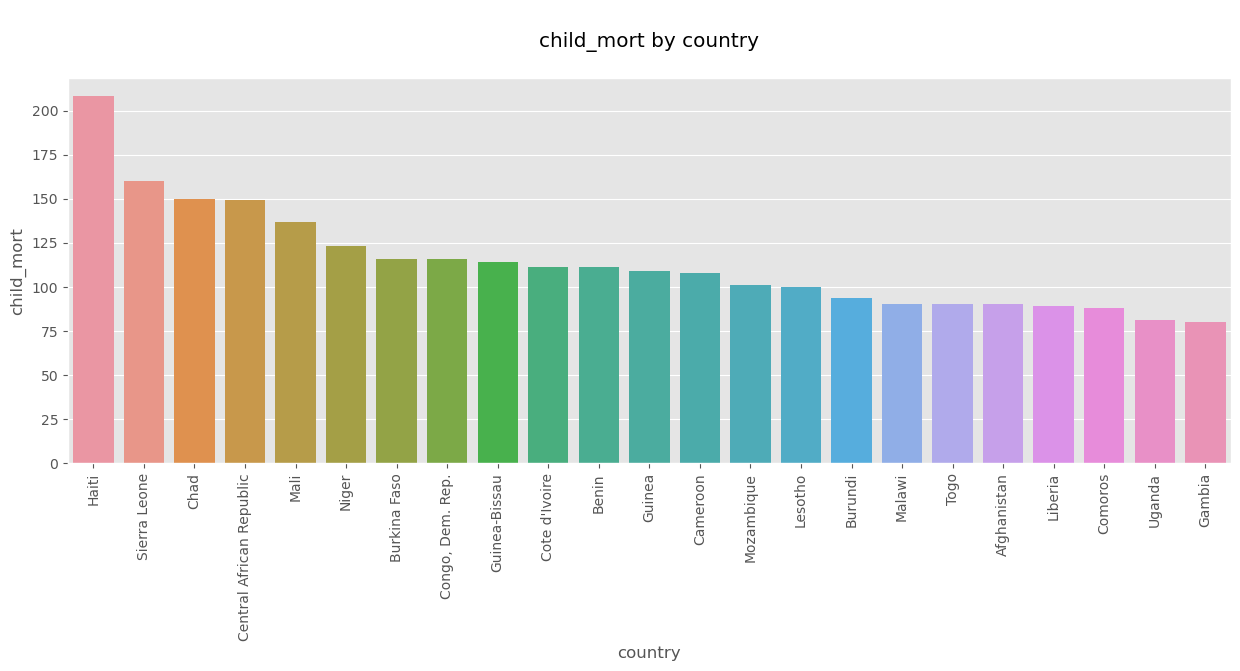

In [96]:
# visualize the child mortality by arrived country
bar_plot_countries(df = final_list, x_var = 'country', y_var = 'child_mort', y_asc=False)

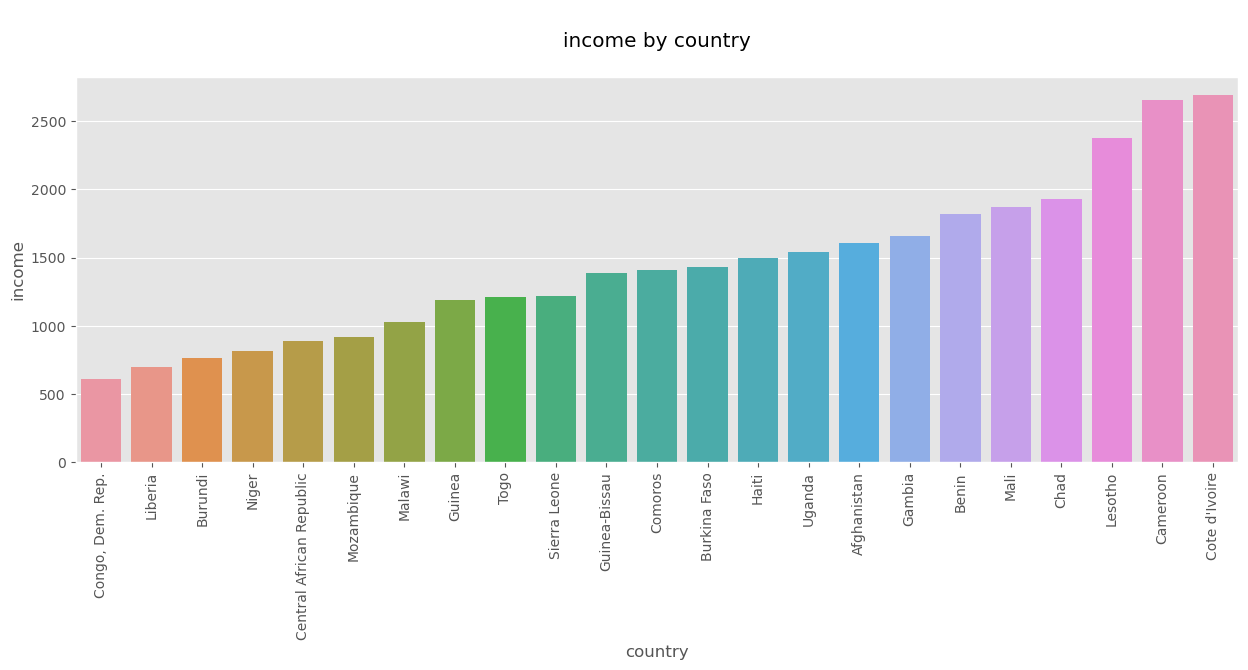

In [97]:
# visualize the income by arrived country
bar_plot_countries(df = final_list, x_var = 'country', y_var = 'income', y_asc=True)

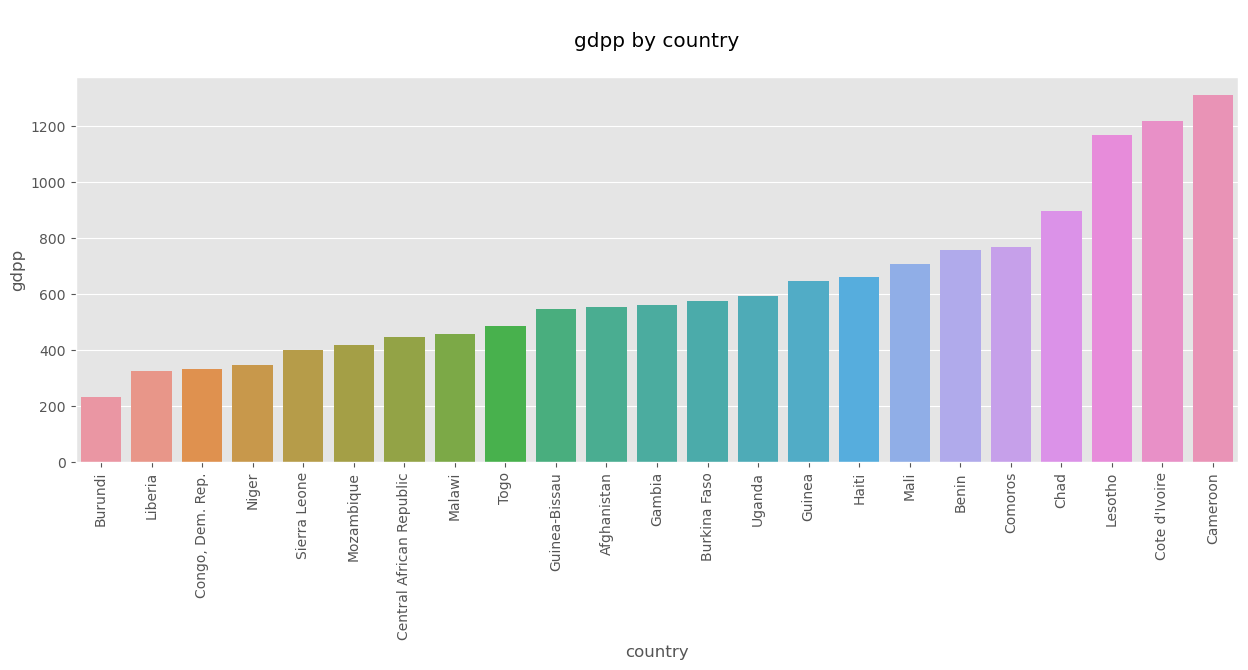

In [98]:
# visualize the gdpp by arrived country
bar_plot_countries(df = final_list, x_var = 'country', y_var = 'gdpp', y_asc=True)

### Closing Statement

We have used PCA above to reduce the variables involved and then done the clustering of countries based on those Principal components and then later we identified few factors like child mortality, income etc which plays a vital role in deciding the development status of the country and builded clusters of countries based on that. 

From these clusters we have identified the below list of countries which are in dire need of aid. The list of countries are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used etc.which we have used to build the model.

## 7. Final List of Countries

In [99]:
final_list['country']

0                  Afghanistan
1                        Benin
2                 Burkina Faso
3                      Burundi
4                     Cameroon
5     Central African Republic
6                         Chad
7             Congo, Dem. Rep.
8                Cote d'Ivoire
9                       Gambia
10                      Guinea
11               Guinea-Bissau
12                       Haiti
13                     Lesotho
14                     Liberia
15                      Malawi
16                        Mali
17                  Mozambique
18                       Niger
19                Sierra Leone
20                        Togo
21                      Uganda
22                     Comoros
Name: country, dtype: object

### End of the Document

By : 
    
    - Rahul Raj PR
    - rahul.infobox@gmail.com
    - https://www.linkedin.com/in/rahul1100100/